# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
data.var()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 
Both PCA and ICA involve projecting data along different axis. 
* PCA tries to maximize variance, this means the first component will be composed of the features with the most variance. From the variances in the data, **Fresh products** shows the most variance (accounting for about half the entire variance) and would probably equate to the first component. Each components is created in decreasing order of variance. An example could be customers that like fresh products but do not like detergents paper
* ICA creates new vectors that maximize separation of the data.
The Vectors are computed independent of the other features. The number of vectors here should be equal to the number of features in the dataset. Each vector in ICA represents features that have been separated. Examples of such vectors would be customers who like Fresh products there should be 6 different ICA components each representing `Fresh, Milk, Grocery, Frozen, Detergents_Paper and Delicatessen`.


### PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA().fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

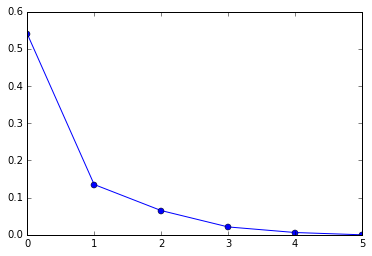

In [3]:
# Explained Variance Plot
x = np.arange(6)
plt.plot(x, 1 - np.cumsum(pca.explained_variance_ratio_), '-o')

**Answer:** 
I'll say the variance drops very quickly. Information from the explained variance ratio shows that the first two components have a total variance of 0.93481597 which is pretty significant. The other four components do not add as much variance as the first two. For my analysis, I will choose two dimensions because the first two dimensions seem to describe the data quite well(>93% of the variance explained) without loosing much information. Taking a look at the graph, we can see the drop off at 3 component.

**3)** What do the dimensions seem to represent? How can you use this information?

**Answer:** The dimensions represents the principal components - a combination of features capturing the most variance. Here is how the first two components can be interpreted:
* The first principal component captures about 46% variance, mostly contains `Fresh products`. The direction of the Vector `Fresh` is negative. This means that about 46% of the customers can be described by their spending habits on `Fresh`. The negative vector shows that the component reduces with increasing spend on fresh.

* The second component is captures the variance in`Milk, Groceries and Detergents_Paper`. This component increases when there is an increase in milk, groceries and detergents paper. We can also say that customers who buy Groceries tend to buy milk and detergents_paper. There is also significant negative correlation between Fresh this component which can be interpreted to mean that customers who a lot of Milk, Groceries and Detergents_paper are likely to buy little **Fresh** products

### ICA

In [4]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import RobustScaler
ica = FastICA(n_components = data.shape[1], random_state = 14).fit(data)

# Print the independent components
RobustScaler().fit_transform(ica.components_)


array([[  0.11092295,   0.01946449,   0.63560324,   0.94009576,
         -1.37937544,  -1.95718525],
       [ -0.30338198,   4.92162927,  -0.41215213,  -0.03522914,
          0.34458346,  -0.68660616],
       [ -0.11092295,  -1.34504672,  -1.33731958,   1.99524467,
         11.25898189,   0.54646666],
       [ -0.93916   ,   0.77456416,  -0.64244661,   0.03522914,
          0.08926772,   0.15039077],
       [  0.95600272,  -0.01946449,   0.41611864, -11.88914887,
         -0.92923805,   0.57583465],
       [  6.49744468,  -0.54579284,   0.41215213,  -0.36975148,
         -0.08926772,  -0.15039077]])

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

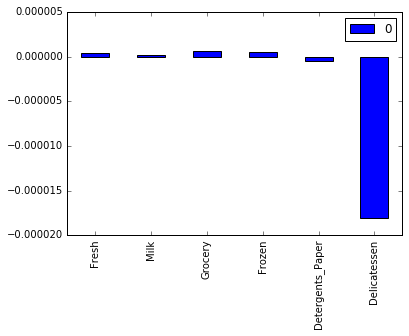

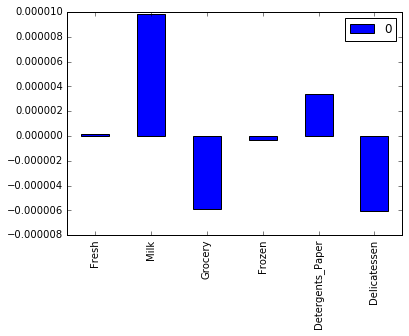

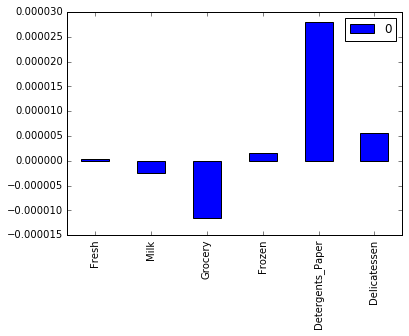

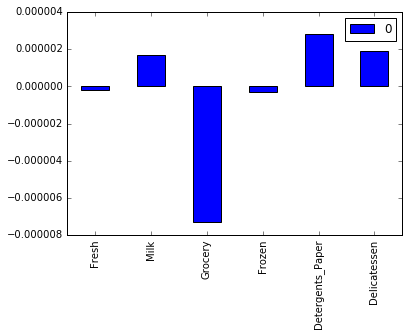

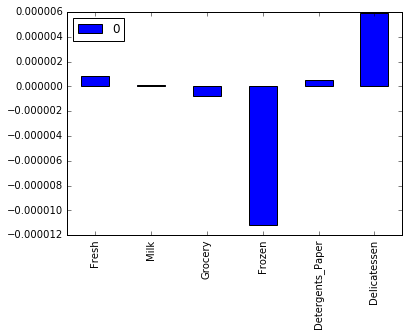

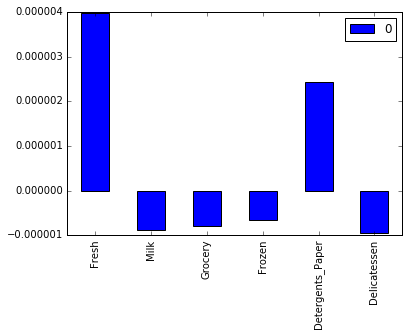

In [5]:
# ICA components group
for x in ica.components_:
    pd.DataFrame(x, index=data.columns).plot(kind = 'bar')
    plt.show()

Answer: 
* Component 1 describes customers that would primarily buy Delicatessen.
* Component 2 shows that there is correletion between Milk and Detergents_paper. It also shows correlation betweeen Groceries and Delicatessen. However, it shows that these two groups are anti-correlated with one another. This means that People who spend a lot on the first group are likely to spend little on the later and vise versa independent of other effects.
* Component 3 shows correlation with Detergents_paper and Delicatessen, both of which are anti-correlated with Groceries.
* Component 4 describes customers that will primarily buy Grocery, it describes how the spend of this customers affect their spend on Milk, Detergents_paper and Delicatessen. It shows that customers that spend a lot on Groceries are likely to spend little on Milk, Detergents_paper and Delicatessen, and vice versa<br>
**How can I use this information**<br>
The information about ICA can be used to determine what type of products to stockup - for example, using the assumption that a supermarket sells all these products. Component 1 tells us that there is a unique group of people who primarily buy Delicatessen. If I am able to identify them, I can target advertising to them to buy more. <br>
I can also use them to know how to position products within a store. Component 6 says that people who by Fresh are likely to buy Detergents_paper, so in arranging the store, I can place those two types of of products close to one another.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

**Answer:**<br>
* In terms of speed, KMeans clustering runs faster than Gaussian Mixture Models, GMM. There is a graph at the base of this document showing the training time for KMeans and GMM.
* In terms of finding global optimum, Kmeans is guaranteed to converge at a local optimum. one might need to run the algorithm many times in order to find a global optimum. On the other hand, GMM can be forced to pick the right number of K by exploiting variational inference.
* In terms of boundary information, Kmeans does hard clustering while Mixture Models do soft clustering. This means Kmeans separated datapoints into distinct clusters while data points in GMM might belong to more than one cluster<br><br>
I would choose GMM to be the best clustering type for our dataset for the following reasons
* The dataset is small and not complex, so one would expect GMM to perform quite well.
* We can achieve global optimum quickly by exploiting variational inference
* Forcing customers into distinct groups might not truly generalize customer information. This is because customers' preference might be affected by numerous other factors not captured by the current features, but exposed as noise through some features. Soft clustering will allow customers benefit from this since noise in data allow customers to exist in more than one cluster

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

Answer: We can see that the number of components optimal for GMM is 6. it is the the point at which the bic score is the lowest.<br>
For Kmeans, we also see the optimal number of clusters to be 5, which is the average point for all the different scores.

In [7]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [8]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


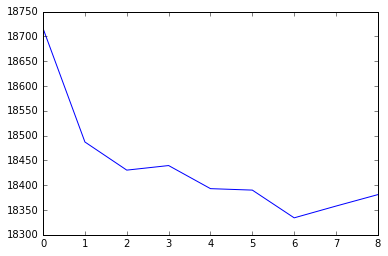

In [9]:
bics = [GMM(n_components=x, random_state=14).fit(reduced_data).bic(reduced_data) for x in xrange(2, 11)]
plt.plot(bics)

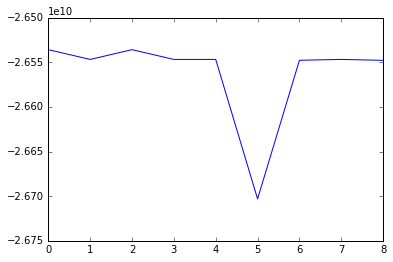

In [22]:
scores = [KMeans(n_clusters=6).fit(reduced_data).score(reduced_data) for x in xrange(2, 11)]
plt.plot(scores)

In [23]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

gmm = GMM(n_components=6).fit(reduced_data)
kmeans = KMeans(n_clusters=5).fit(reduced_data)
print gmm, kmeans

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0) KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [24]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z_GMM = gmm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_KMeans = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [25]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

g_centroids = gmm.means_
k_centroids = kmeans.cluster_centers_
print g_centroids

[[ -5775.25608572  -2804.02019039]
 [  2917.75633744  -7172.67502341]
 [  3172.01367966  13259.54628747]
 [-31722.83442405  -6802.26852706]
 [-18416.8385771   45914.98214137]
 [  9533.08979559   2875.86777608]]


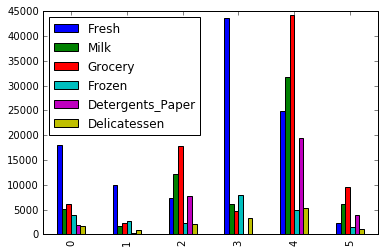

In [31]:
pd.DataFrame(pca.inverse_transform(g_centroids), columns=data.columns).plot(kind='bar')

In [ ]:
# Put the result into a color plot
def draw(Z, mode='KMeans'):
    if mode == 'KMeans':
        centroids = k_centroids
    else:
        centroids = g_centroids
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title(mode + ' clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [ ]:
draw(Z_GMM, mode='GMM')
draw(Z_KMeans)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central object in each cluster represents a generalization for other objects in the cluster. Heres a table to describe the annual spends of the central customer in each cluster<br>
* Customer 1 are moderate-volume customers who spend a considerably on Fresh products and fairly on other products
* Customer 2 are low-volume spenders who spend fairly on Fresh products and negligibly on other products
* Customer 3 are moderate spenders who spend a lot on Fresh, Milk, Grocery and Detergents_paper
* Customer 4 are high volume spenders who spend primarily on Fresh products
* Customer 5 are high volume spenders who spend a lot on Fresh, Milk, Grocery and Detergents_paper
* Customer 6 are moderate spenders who spend considerably on Fresh, Milk, Grocery and Detergents_paper


### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: There were 2 clustering techniques used here Clustering[KMeans and GMM]<br>
Before I go ahead, let me describe the dataset that we have here.
1. The data does not have many features
2. The size of the data is relatively small
3. Data is a homogeneous mixture

It is my opinion that GMM clustering gave me the most insight into the data.
GMM was able to separate the data into different clusters that could easily be visualized.<br>
In practise, GMM helpes you best represent uncertainty by allowing customers to belong to more than one cluster. Since customer behavior is not exactly rigid in real life, I feel that GMM will give more insight into data. This is because it accounts for bias in customer preferences. Customers are human beings and hard labelling them to specific behaviors might not give the best results.

**9)** How would you use that technique to help the company design new experiments?

**Answer:** We can use A/B testing to help the company design new experiments. A/B Testing is a technique that helps us desice which of two models performs better. To setup an A/B test, one will decide on what two models the experiment will be performed on. The first model is called A while the second model is called B. Next the data is split into roughly equal parts, the first part  called datasetA and the second half, datasetB. model A is then trained on datasetA and likewise B. The two models are then compared to see which performs better. To make it even more interesting, model A can be trained using datasetA and evaluated using datasetB.<br><br>
In the case of this company, there are two clustering algorithms here in question. KMeans and GMM. To know which one to use, we can split the dataset into two half and evaluate each model on a half of the data. We then choose the model that performs better. This will help the company use real data to evaluate which machine learning algorithm to apply in customer segmentation

**10)** How would you use that data to help you predict future customer needs?

**Answer:** We can take advantage of supervised learning technique here - decision trees. Now, we know that the closest centroid to a datapoint can be used to generalize the point, we can also use the components that were used to create the centroid to decide on what a customer will need.<br><br>
At the End of our experiments, we have been able to custer customers. Each cluster is generealized by the central customer. Supervised learning involves predicting values in the future based on past input. Decision Trees scan through data and try to identify the rules that predicts the customers based on the features. Building of this tree is the learning process. Once this tree has been created, one can now use this tree to predict the spending habits of future customers.

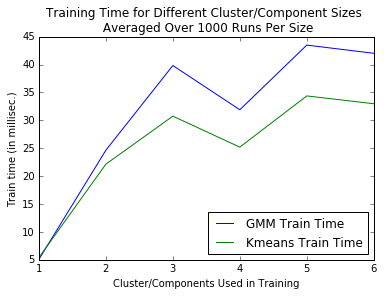

In [29]:
import time
n = 1000
k = 6

kmeans_train_times = []
for k in xrange(1, 7):
    cum_time = 0.
    for i in xrange(n):
        start = time.time()
        KMeans(n_clusters=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    kmeans_train_times.append([k, train_time])

km_df = pd.DataFrame(kmeans_train_times, columns=['KM_Clusters', 'KM_Time'])

gmm_train_times = []
for k in xrange(1, 7):
    cum_time = 0.
    for i in xrange(n):
        start = time.time()
        GMM(n_components=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    gmm_train_times.append([k, train_time])

gmm_df = pd.DataFrame(gmm_train_times, columns=['GMM_Components', 'GMM_Time'])
times_df = km_df.join(gmm_df)

plt.plot(times_df.GMM_Components, times_df.GMM_Time * 1000., label='GMM Train Time')
plt.plot(times_df.GMM_Components, times_df.KM_Time * 1000., label='Kmeans Train Time')
plt.legend(loc='best')
plt.ylabel('Train time (in millisec.)')
plt.xlabel('Cluster/Components Used in Training')
plt.title('Training Time for Different Cluster/Component Sizes \n Averaged Over {} Runs Per Size'.format(n))
plt.show()